In [1831]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import warnings
import lightgbm as lgb
warnings.simplefilter('ignore')

In [1832]:
def metric(ytest,ypred):
    return log_loss(ytest,ypred)

In [1833]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Sample_Submission.xlsx')

In [1834]:
train.head()

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0     2           8.032                    14                     8   
1    31          77.730                     8                     3   
2    40          59.203                     3                    12   
3    12          73.080                     4                     5   
4     4          15.666                    13                    15   

   Fin_Score  Loss_score  Past_Results  IsUnderRisk  
0          3           6             0            1  
1          3           8             1            0  
2         11           3             0            1  
3          7           6             0            0  
4          6           7             2            1

In [1835]:
test.head()

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
0    41          18.272                    13                    12   
1    17          64.799                     6                    10   
2    31          68.890                     3                     3   
3     3          16.492                    15                    10   
4     9          17.178                     7                     3   

   Fin_Score  Loss_score  Past_Results  
0          9           7             0  
1          7           4             1  
2          7           8             0  
3          7           4             1  
4          8           3             1

In [1836]:
train.describe()

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
count  543.000000      543.000000            543.000000            543.000000   
mean    19.576427       32.259346              8.189687              7.327808   
std     14.722687       24.887291              3.312022              3.450667   
min      0.000000        5.185000              3.000000              3.000000   
25%      6.000000       13.565000              6.000000              5.000000   
50%     14.000000       19.803000              8.000000              7.000000   
75%     37.000000       62.594000             11.000000             10.000000   
max     44.000000       80.809000             15.000000             15.000000   

        Fin_Score  Loss_score  Past_Results  IsUnderRisk  
count  543.000000  543.000000    543.000000   543.000000  
mean     7.046041    5.530387      0.613260     0.626151  
std      3.156978    1.839124      0.764509     0.484270  
min      3.000000    3.000000      0.000000     0.000000  
25%      5.000000    4.000000      0.000000     0.000000  
50%      7.000000    6.000000      1.000000     1.000000  
75%      8.000000    7.000000      1.000000     1.000000  
max     15.000000   13.000000     10.000000     1.000000

In [1837]:
test.describe()

City  Location_Score  Internal_Audit_Score  External_Audit_Score  \
count  233.000000      233.000000            233.000000            233.000000   
mean    19.343348       32.591034              7.854077              7.424893   
std     14.915933       25.185948              3.176584              3.525117   
min      0.000000        5.469000              3.000000              3.000000   
25%      6.000000       12.156000              6.000000              5.000000   
50%     13.000000       19.968000              7.000000              7.000000   
75%     37.000000       62.766000             10.000000             10.000000   
max     41.000000       77.668000             15.000000             15.000000   

        Fin_Score  Loss_score  Past_Results  
count  233.000000  233.000000    233.000000  
mean     6.957082    5.648069      0.579399  
std      3.337077    1.708424      0.703382  
min      3.000000    3.000000      0.000000  
25%      4.000000    4.000000      0.000000  
50%      6.000000    6.000000      1.000000  
75%      8.000000    7.000000      1.000000  
max     15.000000   10.000000      5.000000

In [1838]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
City                    543 non-null int64
Location_Score          543 non-null float64
Internal_Audit_Score    543 non-null int64
External_Audit_Score    543 non-null int64
Fin_Score               543 non-null int64
Loss_score              543 non-null int64
Past_Results            543 non-null int64
IsUnderRisk             543 non-null int64
dtypes: float64(1), int64(7)
memory usage: 34.0 KB


In [1839]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
City                    233 non-null int64
Location_Score          233 non-null float64
Internal_Audit_Score    233 non-null int64
External_Audit_Score    233 non-null int64
Fin_Score               233 non-null int64
Loss_score              233 non-null int64
Past_Results            233 non-null int64
dtypes: float64(1), int64(6)
memory usage: 12.8 KB


In [1840]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [1841]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

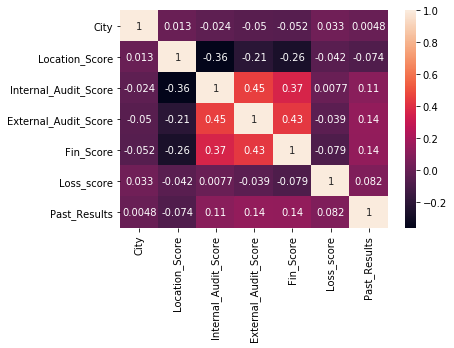

In [1842]:
sns.heatmap(train.drop(columns='IsUnderRisk').corr(), annot = True)

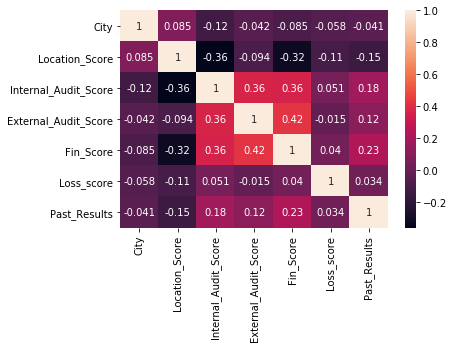

In [1843]:
sns.heatmap(test.corr(), annot = True)

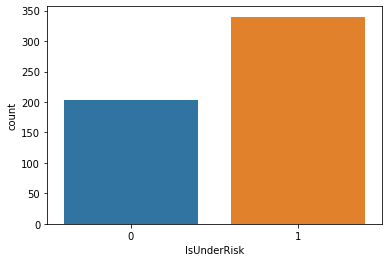

In [1844]:
sns.countplot(train.IsUnderRisk)

In [1845]:
city_unq_tr = list(train.City.unique())
city_unq_te = list(test.City.unique())
a = []
for c in city_unq_tr:
    if c not in city_unq_te:
        print(c)
        a.append(c)

16
32
14
43
24
25
33
15
7
42
44


tr = set(train.City.unique()).difference(set(test.City.unique()))
te = set(test.City.unique()).difference(set(train.City.unique()))

train.City = train.City.apply(lambda x: 'other' if x in tr else x)
test.City = test.City.apply(lambda x: 'other' if x in te else x)

train.City = train.City.astype('category')
test.City = test.City.astype('category')

In [1846]:
del train['City']
del test['City']

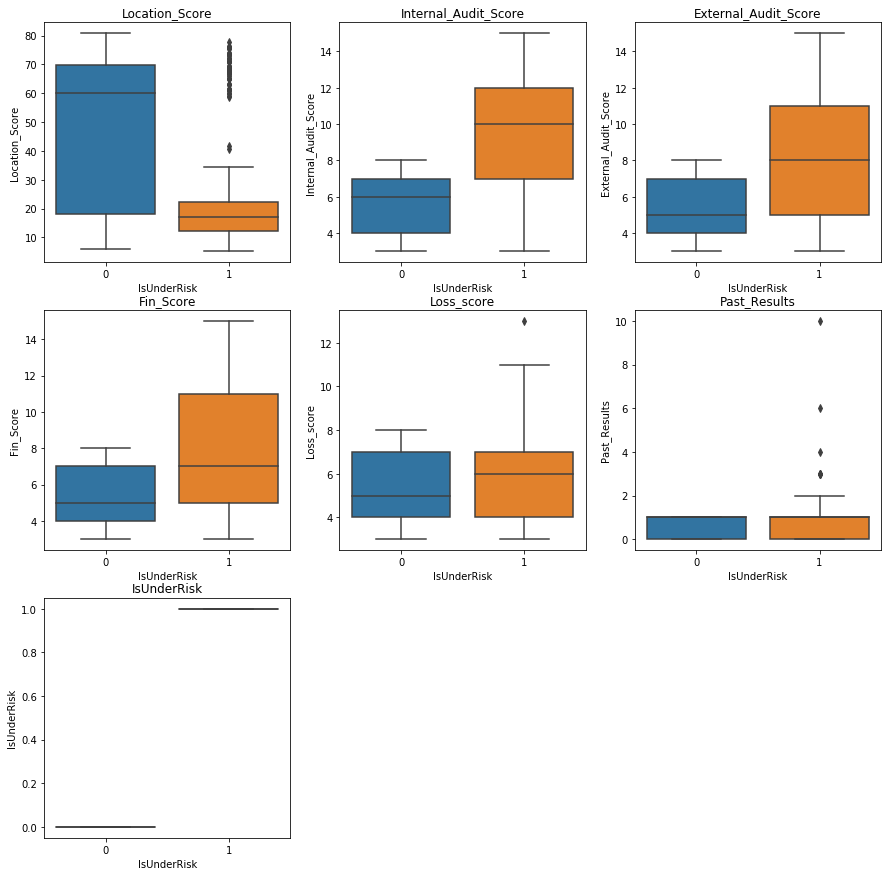

In [1847]:
p = 0
plt.figure(figsize=(15,15))
for i in train.columns:
    plt.subplot(3,3,p+1)
    sns.boxplot(train.IsUnderRisk, train[i])
    plt.title(i)
    p=p+1

In [1848]:
ind = train[train.Loss_score == train.Loss_score.max()].index
train.drop(index=ind, inplace=True)
train.reset_index(inplace=True, drop = True)

In [1849]:
train.groupby('Past_Results')['IsUnderRisk'].value_counts()

Past_Results  IsUnderRisk
0             1              151
              0               99
1             1              167
              0              104
2             1               13
3             1                5
4             1                1
6             1                1
10            1                1
Name: IsUnderRisk, dtype: int64

In [1850]:
train.Past_Results = train.Past_Results.apply(lambda x: 2 if x>1 else x).astype('category')
test.Past_Results = test.Past_Results.apply(lambda x: 2 if x>1 else x).astype('category')

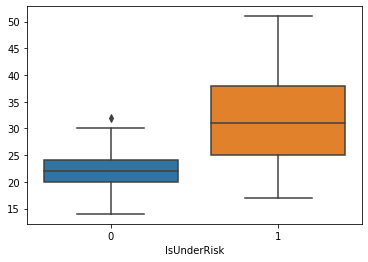

In [1851]:
sns.boxplot(x = train.IsUnderRisk, y = train.Fin_Score+train.Internal_Audit_Score+train.External_Audit_Score+train.Loss_score)

In [1852]:
(train.Fin_Score+train.Internal_Audit_Score+train.External_Audit_Score+train.Loss_score>=30).value_counts()

False    347
True     195
dtype: int64

In [1853]:
train['Total_score']=(train.Fin_Score+train.Internal_Audit_Score+train.External_Audit_Score+train.Loss_score)
test['Total_score']=(test.Fin_Score+test.Internal_Audit_Score+test.External_Audit_Score+test.Loss_score)

In [1854]:
#train['Total_score_pakka']=train.Total_score.apply(lambda x: 1 if x>33 else 0)
#test['Total_score_pakka']=test.Total_score.apply(lambda x: 1 if x>33 else 0)

In [1855]:
train.head(1)

Location_Score  Internal_Audit_Score  External_Audit_Score  Fin_Score  \
0           8.032                    14                     8          3   

   Loss_score Past_Results  IsUnderRisk  Total_score  
0           6            0            1           31

In [1856]:
#train.Location_Score = np.log1p(train.Location_Score)
#test.Location_Score = np.log1p(test.Location_Score)

In [1857]:
train.Loss_score.value_counts()

3     98
6     94
8     92
4     90
5     82
7     78
11     3
9      3
10     2
Name: Loss_score, dtype: int64

In [1858]:
test.Loss_score.value_counts()

6     50
8     45
4     39
5     34
7     32
3     32
10     1
Name: Loss_score, dtype: int64

In [1859]:
train.Loss_score = train.Loss_score.apply(lambda x: 10 if x>8 else x)
test.Loss_score = test.Loss_score.apply(lambda x: 10 if x>8 else x)

In [1860]:
df = train.append(test, sort=False)
df.reset_index(drop = True, inplace = True)

In [1861]:
print(df.Location_Score.skew(), df.Location_Score.kurt())

0.7234461556224966 -1.2245615882554988


In [1862]:
func = {'Location_Score':['mean', 'median', 'sum', 'min', 'max'], 
        'Internal_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'External_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Fin_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Loss_score': ['mean', 'median', 'sum', 'min', 'max'],
        'Total_score': ['mean', 'median', 'sum', 'min', 'max']
       }
temp_2  = df.groupby('Past_Results').agg(func)
temp_2.columns = ['_Past_'.join(c) for c in temp_2.columns.values]

df = df.merge(temp_2, on = 'Past_Results', how = 'left', sort=False)

In [1863]:
func = {'Location_Score':['mean', 'median', 'sum', 'min', 'max'], 
        'External_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Fin_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Loss_score': ['mean', 'median', 'sum', 'min', 'max'],
        'Total_score': ['mean', 'median', 'sum', 'min', 'max']
       }
temp_2  = df.groupby('Internal_Audit_Score').agg(func)
temp_2.columns = ['_Internal_'.join(c) for c in temp_2.columns.values]

df = df.merge(temp_2, on = 'Internal_Audit_Score', how = 'left', sort=False)

In [1864]:
func = {'Location_Score':['mean', 'median', 'sum', 'min', 'max'], 
        'Internal_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Fin_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Loss_score': ['mean', 'median', 'sum', 'min', 'max'],
        'Total_score': ['mean', 'median', 'sum', 'min', 'max']
       }
temp_2  = df.groupby('External_Audit_Score').agg(func)
temp_2.columns = ['_external_'.join(c) for c in temp_2.columns.values]

df = df.merge(temp_2, on = 'External_Audit_Score', how = 'left', sort=False)

In [1865]:
func = {'Location_Score':['mean', 'median', 'sum', 'min', 'max'], 
        'Internal_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'External_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Loss_score': ['mean', 'median', 'sum', 'min', 'max'],
        'Total_score': ['mean', 'median', 'sum', 'min', 'max']
       }
temp_2  = df.groupby('Fin_Score').agg(func)
temp_2.columns = ['_Fin_'.join(c) for c in temp_2.columns.values]

df = df.merge(temp_2, on = 'Fin_Score', how = 'left', sort=False)

In [1866]:
func = {'Location_Score':['mean', 'median', 'sum', 'min', 'max'], 
        'Internal_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'External_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Fin_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Total_score': ['mean', 'median', 'sum', 'min', 'max']
       }
temp_2  = df.groupby('Loss_score').agg(func)
temp_2.columns = ['_Loss_'.join(c) for c in temp_2.columns.values]

df = df.merge(temp_2, on = 'Loss_score', how = 'left', sort=False)

In [1867]:
func = {'Location_Score':['mean', 'median', 'sum', 'min', 'max'], 
        'Internal_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'External_Audit_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Fin_Score': ['mean', 'median', 'sum', 'min', 'max'],
        'Loss_score': ['mean', 'median', 'sum', 'min', 'max'],
        }
temp_2  = df.groupby('Total_score').agg(func)
temp_2.columns = ['_Total_'.join(c) for c in temp_2.columns.values]

df = df.merge(temp_2, on = 'Total_score', how = 'left', sort=False)

In [1868]:
df.head()

Location_Score  Internal_Audit_Score  External_Audit_Score  Fin_Score  \
0           8.032                    14                     8          3   
1          77.730                     8                     3          3   
2          59.203                     3                    12         11   
3          73.080                     4                     5          7   
4          15.666                    13                    15          6   

   Loss_score Past_Results  IsUnderRisk  Total_score  \
0           6            0          1.0           31   
1           8            1          0.0           22   
2           3            0          1.0           29   
3           6            0          0.0           22   
4           7            2          1.0           41   

   Location_Score_Past_mean  Location_Score_Past_median  \
0                 33.955464                      20.175   
1                 31.986173                      20.020   
2                 33.955464                      20.175   
3                 33.955464                      20.175   
4                 18.144400                      15.109   

   Location_Score_Past_sum  Location_Score_Past_min  Location_Score_Past_max  \
0                12359.789                    5.363                   80.809   
1                12186.732                    5.185                   80.664   
2                12359.789                    5.363                   80.809   
3                12359.789                    5.363                   80.809   
4                  544.332                    7.106                   76.010   

   Internal_Audit_Score_Past_mean  Internal_Audit_Score_Past_median  \
0                        7.739011                                 7   
1                        8.191601                                 8   
2                        7.739011                                 7   
3                        7.739011                                 7   
4                       11.066667                                11   

   Internal_Audit_Score_Past_sum  Internal_Audit_Score_Past_min  \
0                           2817                              3   
1                           3121                              3   
2                           2817                              3   
3                           2817                              3   
4                            332                              3   

   Internal_Audit_Score_Past_max  External_Audit_Score_Past_mean  \
0                             15                        7.076923   
1                             15                        7.293963   
2                             15                        7.076923   
3                             15                        7.076923   
4                             15                       11.433333   

   External_Audit_Score_Past_median  External_Audit_Score_Past_sum  \
0                               6.0                           2576   
1                               7.0                           2779   
2                               6.0                           2576   
3                               6.0                           2576   
4                              12.5                            343   

   External_Audit_Score_Past_min  External_Audit_Score_Past_max  \
0                              3                             15   
1                              3                             15   
2                              3                             15   
3                              3                             15   
4                              3                             15   

   Fin_Score_Past_mean  Fin_Score_Past_median  Fin_Score_Past_sum  \
0             6.664835                      6                2426   
1             7.052493                      7                2687   
2             6.664835                      6                2426   
3             6.664835            

In [1869]:
df.shape

(775, 163)

In [1870]:
target='IsUnderRisk'

In [1871]:
# No. of elements which are in test but not in train
for col in train.columns.tolist():
    if col != target:
        print("{}----->\t{}".format(col,len(set(test[col].unique())-set(train[col].unique()))))

Location_Score----->	228
Internal_Audit_Score----->	0
External_Audit_Score----->	0
Fin_Score----->	0
Loss_score----->	0
Past_Results----->	0
Total_score----->	0


In [1872]:
#sns.pairplot(train, hue = 'IsUnderRisk')

In [1873]:
train['IsUnderRisk'].value_counts()

1    339
0    203
Name: IsUnderRisk, dtype: int64

In [1874]:
df.shape

(775, 163)

In [1875]:
train = df[df.IsUnderRisk.notnull()]
test = df[df.IsUnderRisk.isnull()]
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)
del test['IsUnderRisk']

In [1876]:
label=train.IsUnderRisk

In [1877]:
#train.Internal_Audit_Score=train.Internal_Audit_Score.apply(lambda x : x/(train.Internal_Audit_Score).nunique())
#test.Internal_Audit_Score=test.Internal_Audit_Score.apply(lambda x : x/(test.Internal_Audit_Score).nunique())

In [1878]:
#for i in ['Internal_Audit_Score','External_Audit_Score','Fin_Score','Loss_score']:
#    train[i]=train[i].apply(lambda x : (x/(train[i].nunique())))
#    test[i]=test[i].apply(lambda x : (x/(test[i].nunique())))

In [1879]:
train.head()

Location_Score  Internal_Audit_Score  External_Audit_Score  Fin_Score  \
0           8.032                    14                     8          3   
1          77.730                     8                     3          3   
2          59.203                     3                    12         11   
3          73.080                     4                     5          7   
4          15.666                    13                    15          6   

   Loss_score Past_Results  IsUnderRisk  Total_score  \
0           6            0          1.0           31   
1           8            1          0.0           22   
2           3            0          1.0           29   
3           6            0          0.0           22   
4           7            2          1.0           41   

   Location_Score_Past_mean  Location_Score_Past_median  \
0                 33.955464                      20.175   
1                 31.986173                      20.020   
2                 33.955464                      20.175   
3                 33.955464                      20.175   
4                 18.144400                      15.109   

   Location_Score_Past_sum  Location_Score_Past_min  Location_Score_Past_max  \
0                12359.789                    5.363                   80.809   
1                12186.732                    5.185                   80.664   
2                12359.789                    5.363                   80.809   
3                12359.789                    5.363                   80.809   
4                  544.332                    7.106                   76.010   

   Internal_Audit_Score_Past_mean  Internal_Audit_Score_Past_median  \
0                        7.739011                                 7   
1                        8.191601                                 8   
2                        7.739011                                 7   
3                        7.739011                                 7   
4                       11.066667                                11   

   Internal_Audit_Score_Past_sum  Internal_Audit_Score_Past_min  \
0                           2817                              3   
1                           3121                              3   
2                           2817                              3   
3                           2817                              3   
4                            332                              3   

   Internal_Audit_Score_Past_max  External_Audit_Score_Past_mean  \
0                             15                        7.076923   
1                             15                        7.293963   
2                             15                        7.076923   
3                             15                        7.076923   
4                             15                       11.433333   

   External_Audit_Score_Past_median  External_Audit_Score_Past_sum  \
0                               6.0                           2576   
1                               7.0                           2779   
2                               6.0                           2576   
3                               6.0                           2576   
4                              12.5                            343   

   External_Audit_Score_Past_min  External_Audit_Score_Past_max  \
0                              3                             15   
1                              3                             15   
2                              3                             15   
3                              3                             15   
4                              3                             15   

   Fin_Score_Past_mean  Fin_Score_Past_median  Fin_Score_Past_sum  \
0             6.664835                      6                2426   
1             7.052493                      7                2687   
2             6.664835                      6                2426   
3             6.664835            

In [1880]:
label = train.IsUnderRisk
del train['IsUnderRisk']

In [1881]:
train.iloc[:,1:6] = train.iloc[:,1:6].astype('category')  
test.iloc[:,1:6] = test.iloc[:,1:6].astype('category') 

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [1882]:
mm = MinMaxScaler()
train=pd.DataFrame(mm.fit_transform(train), columns=train.columns)
test=pd.DataFrame(mm.fit_transform(test), columns=test.columns)

In [1883]:
train.shape, test.shape

((542, 201), (233, 201))

In [1884]:
#train.drop(columns=['City'],inplace=True)
#test.drop(columns=['City'],inplace=True)

In [1885]:
pd.set_option('max_columns', 500)
train.head()

Location_Score  Total_score  Location_Score_Past_mean  \
0        0.037647     0.459459                  1.000000   
1        0.959285     0.216216                  0.875449   
2        0.714297     0.405405                  1.000000   
3        0.897797     0.216216                  1.000000   
4        0.138594     0.729730                  0.000000   

   Location_Score_Past_median  Location_Score_Past_sum  \
0                    1.000000                 1.000000   
1                    0.969404                 0.985353   
2                    1.000000                 1.000000   
3                    1.000000                 1.000000   
4                    0.000000                 0.000000   

   Location_Score_Past_min  Location_Score_Past_max  \
0                  0.09266                 1.000000   
1                  0.00000                 0.969785   
2                  0.09266                 1.000000   
3                  0.09266                 1.000000   
4                  1.00000                 0.000000   

   Internal_Audit_Score_Past_mean  Internal_Audit_Score_Past_median  \
0                        0.000000                              0.00   
1                        0.136009                              0.25   
2                        0.000000                              0.00   
3                        0.000000                              0.00   
4                        1.000000                              1.00   

   Internal_Audit_Score_Past_sum  Internal_Audit_Score_Past_min  \
0                          0.891                            0.0   
1                          1.000                            0.0   
2                          0.891                            0.0   
3                          0.891                            0.0   
4                          0.000                            0.0   

   Internal_Audit_Score_Past_max  External_Audit_Score_Past_mean  \
0                            0.0                        0.000000   
1                            0.0                        0.049821   
2                            0.0                        0.000000   
3                            0.0                        0.000000   
4                            0.0                        1.000000   

   External_Audit_Score_Past_median  External_Audit_Score_Past_sum  \
0                          0.000000                       0.916667   
1                          0.153846                       1.000000   
2                          0.000000                       0.916667   
3                          0.000000                       0.916667   
4                          1.000000                       0.000000   

   External_Audit_Score_Past_min  External_Audit_Score_Past_max  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   Fin_Score_Past_mean  Fin_Score_Past_median  Fin_Score_Past_sum  \
0              0.00000                    0.0            0.889687   
1              0.09607                    0.2            1.000000   
2              0.00000                    0.0            0.889687   
3              0.00000                    0.0            0.889687   
4              1.00000                    1.0            0.000000   

   Fin_Score_Past_min  Fin_Score_Past_max  Loss_score_Past_mean  \
0                 0.0                 0.0              0.000000   
1                 0.0                 0.0              0.178606   
2                 0.0                 0.0              0.000000   
3                 0.0                 0.0              0.000000   
4                 0.0                 0.0              1.000000   

   Loss_score_Past_median  Loss_score_Past_sum  Loss_score_Past_min  \
0         

In [1886]:
train.shape

(542, 201)

In [1887]:
res = pd.DataFrame()

In [1888]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
rf = TomekLinks(random_state=9799)
x, y = rf.fit_sample(train, label)
x = pd.DataFrame(x, columns=train.columns)

In [1889]:
train = x

In [1890]:
label = pd.Series(y)

In [1891]:
train.shape

(521, 201)

In [1909]:
model = [KNeighborsClassifier(n_neighbors=13, n_jobs=-1), SVC(probability=True,kernel='rbf', random_state=134), 
         LogisticRegression(class_weight='balanced'), 
         lgb.LGBMClassifier(class_weight='balanced')
#        ,BaggingClassifier(KNeighborsClassifier(n_neighbors=13, n_jobs=-1), n_estimators=100), 
#         BaggingClassifier(SVC(probability=True, random_state=234), n_estimators=100), 
#         BaggingClassifier(LogisticRegression(class_weight='balanced'), n_estimators=100)
        ]

predicted = []
skf = StratifiedShuffleSplit(n_splits=10, random_state=90011)

for i in model:
    mod = i
    a = list()
    b = list()
    for i,(train_index,test_index) in enumerate(skf.split(train,label)):
        x1_train,x1_test = train.loc[train_index,:],train.loc[test_index,:]
        y1_train,y1_test = label.loc[train_index],label.loc[test_index]
        
        mod.fit(x1_train,y1_train)
        pred_train = mod.predict_proba(x1_train)
        pred_test = mod.predict_proba(x1_test)
        
        a.append(log_loss(y1_train, pred_train))
        b.append(log_loss(y1_test, pred_test))
        
        if str(mod)==str(SVC(probability=True, random_state=234)):
            predicted.append(pd.DataFrame((mod.predict_proba(test))))
            
          #  lgb.plot_importance(mod)
        
        print(f'Training Loss in fold {i+1}:\t{log_loss(y1_train, pred_train)}\t\tVal Loss in fold {i+1}:\t{log_loss(y1_test,pred_test)}')
    print(str(mod).split('(')[0],'  Training Loss : ',np.mean(a),'     Testing Loss : ',np.mean(b), '\n')
        
    

Training Loss in fold 1:	0.2931771047262498		Val Loss in fold 1:	0.28084866362717104
Training Loss in fold 2:	0.29387329236747295		Val Loss in fold 2:	0.2767545440971791
Training Loss in fold 3:	0.2919064371688257		Val Loss in fold 3:	0.3020872899710957
Training Loss in fold 4:	0.29910590276649435		Val Loss in fold 4:	0.22401322002837082
Training Loss in fold 5:	0.2803964098301808		Val Loss in fold 5:	0.3932764033919643
Training Loss in fold 6:	0.29114201627791514		Val Loss in fold 6:	0.2677148113950447
Training Loss in fold 7:	0.28869192355937395		Val Loss in fold 7:	0.29842523351405675
Training Loss in fold 8:	0.2888302827875735		Val Loss in fold 8:	0.26835740378042566
Training Loss in fold 9:	0.30023863338584433		Val Loss in fold 9:	0.24197721416605963
Training Loss in fold 10:	0.28222588228438417		Val Loss in fold 10:	0.3743460342430815
KNeighborsClassifier   Training Loss :  0.2909587885154315      Testing Loss :  0.2927800818214449 

Training Loss in fold 1:	0.2359776082114079		V

In [1901]:
for i in predicted:
    res=pd.concat([res,i],axis=1)

In [1902]:
res['0']=np.mean(res[0],axis=1)
res['1']=np.mean(res[1],axis=1)
res.drop(columns=[0,1],inplace=True)
res.rename({'0':0,'1':1},axis=1,inplace=True)

In [1903]:
res.head()

0         1
0  1.802218e-08  1.000000
1  2.233717e-02  0.977663
2  8.359955e-01  0.164005
3  8.172820e-08  1.000000
4  7.482393e-01  0.251761

In [1904]:
len(res)

233

In [1905]:
res.to_excel('Result.xlsx',index=False)

In [1906]:
res

0         1
0    1.802218e-08  1.000000
1    2.233717e-02  0.977663
2    8.359955e-01  0.164005
3    8.172820e-08  1.000000
4    7.482393e-01  0.251761
5    8.097773e-01  0.190223
6    8.089019e-01  0.191098
7    8.270888e-01  0.172911
8    7.803936e-03  0.992196
9    3.380615e-07  1.000000
10   1.139706e-02  0.988603
11   8.191440e-01  0.180856
12   7.088777e-01  0.291122
13   8.143798e-01  0.185620
14   5.935700e-07  0.999999
15   8.035492e-01  0.196451
16   7.713995e-01  0.228600
17   7.650470e-01  0.234953
18   2.722441e-02  0.972776
19   1.350928e-08  1.000000
20   7.398827e-01  0.260117
21   7.852329e-01  0.214767
22   2.816075e-02  0.971839
23   8.141518e-01  0.185848
24   8.157500e-01  0.184250
25   1.582315e-06  0.999998
26   7.578413e-01  0.242159
27   6.645016e-09  1.000000
28   3.245799e-07  1.000000
29   7.633293e-01  0.236671
..            ...       ...
203  2.679297e-03  0.997321
204  5.492754e-07  0.999999
205  7.927655e-01  0.207234
206  5.965098e-01  0.403490
207  2.840776e-04  0.999716
208  7.885441e-01  0.211456
209  1.492927e-02  0.985071
210  7.401137e-01  0.259886
211  1.137792e-07  1.000000
212  7.830900e-01  0.216910
213  1.427966e-02  0.985720
214  8.285028e-01  0.171497
215  1.647515e-02  0.983525
216  7.892360e-01  0.210764
217  6.888177e-01  0.311182
218  7.099323e-01  0.290068
219  8.307604e-01  0.169240
220  8.040548e-01  0.195945
221  2.430846e-02  0.975692
222  7.812451e-01  0.218755
223  8.091661e-01  0.190834
224  3.225496e-08  1.000000
225  2.171504e-02  0.978285
226  6.837795e-01  0.316221
227  1.688255e-02  0.983117
228  8.061694e-01  0.193831
229  6.377186e-01  0.362281
230  7.605997e-01  0.239400
231  9.155019e-09  1.000000
232  8.072737e-01  0.192726

[233 rows x 2 columns]